## **Section 4.1: Effect of Onion Service Version and Victim Setting**

- With this experiment, we determined the effect that the onion service version (`v2` and `v3`) of the embedded non-existing onion address and the hardware and network setting of the victim have on the achieved `HS_DESC` lookup rate.
- Before this experiment, we had fixed `60 seconds` as the attack duration and `script` (called `js` below) as the embedded subresource type.
- The data was collected across `3` different machines on three different types of network settings.
- The list of `50` sampled guards we used for all runs is: `2020-08-26-19-57-49_guards_num_sampled_from_guard_prob-50.csv`.
- For each of the `3` victim settings and each of the `50` sampled guards, we ran the attack script `3` times per each of the `2` onion versions per each of the `6` injection rates (`1`, `2`, `3`, `4`, `5`, and `6`).
- We thus expect to have `3 * 50 * 3 * 2 * 6 = 5,400` result folders. However, due to some experiments not completing, we see a few less result folders in each experiment setting (`5,253`).

In [1]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from glob import glob
from os.path import abspath, dirname, join, basename, isfile

In [2]:
DATA_DIR = abspath("./2_data_onion-version_victim-setting")
EXPERIMENT_PARAMS_JSON = "experiment.json"

In [3]:
def load_from_json(json_path):
    return json.loads(open(json_path).read())

In [4]:
# Should yield a little less than 150 for each combination and 5,253 in total.
! ls $DATA_DIR | grep "COMPLETED" | cut -d "_" -f 6,7 | sort | uniq -c
! ls $DATA_DIR | grep "COMPLETED" | wc -l

    144 gacar-Latitude-E5430-non-vPro_1.0-v2-js-60s
    144 gacar-Latitude-E5430-non-vPro_1.0-v3-js-60s
    144 gacar-Latitude-E5430-non-vPro_2.0-v2-js-60s
    144 gacar-Latitude-E5430-non-vPro_2.0-v3-js-60s
    147 gacar-Latitude-E5430-non-vPro_3.0-v2-js-60s
    147 gacar-Latitude-E5430-non-vPro_3.0-v3-js-60s
    147 gacar-Latitude-E5430-non-vPro_4.0-v2-js-60s
    147 gacar-Latitude-E5430-non-vPro_4.0-v3-js-60s
    146 gacar-Latitude-E5430-non-vPro_5.0-v2-js-60s
    147 gacar-Latitude-E5430-non-vPro_5.0-v3-js-60s
    147 gacar-Latitude-E5430-non-vPro_6.0-v2-js-60s
    147 gacar-Latitude-E5430-non-vPro_6.0-v3-js-60s
    144 gacar-lnx-desktop_1.0-v2-js-60s
    144 gacar-lnx-desktop_1.0-v3-js-60s
    144 gacar-lnx-desktop_2.0-v2-js-60s
    144 gacar-lnx-desktop_2.0-v3-js-60s
    150 gacar-lnx-desktop_3.0-v2-js-60s
    150 gacar-lnx-desktop_3.0-v3-js-60s
    149 gacar-lnx-desktop_4.0-v2-js-60s
    150 gacar-lnx-desktop_4.0-v3-js-60s
    150 gacar-lnx-desktop_5.0-v2-js-60s
    150 gacar-ln

#### How many victim lookups (`HS_DESC` lookups with `404 Not Found` response) did we see?

* The following should yield: `3,532,291`.

In [5]:
%%bash
{ grep -r "hsdesc_notfound_cnt" ./2_data_onion-version_victim-setting | tr -s " " | cut -d " " -f 3 | tr -s ",\n" "+"; printf "0\n"; } | bc

3532291


In [6]:
result_tuples = []

# Read in all result.json and experiment.json files.
for results_json in glob(join(DATA_DIR, "*COMPLETED", "results.json")):
    
    exp_json = join(dirname(results_json), EXPERIMENT_PARAMS_JSON)
    if not isfile(exp_json):
        continue

    exp_params = load_from_json(exp_json)
    results = load_from_json(results_json)
    results.update(exp_params)
    result_tuples.append(results)

# Create the dataframe from the list of dicts.
df = pd.DataFrame.from_records(result_tuples)

In [7]:
print(len(df))
df.head(15)

5253


,run_time_sec,circ_built_per_sec,hsdesc_notfound_per_sec,circ_cnt,circ_built_cnt,circ_failed_cnt,circ_undetermined_cnt,hsdesc_cnt,hsdesc_recvd_cnt,hsdesc_notfound_cnt,...,guard_or_port,guard_dir_ip,guard_dir_port,circuit_log_interval,worker_buffer_time,main_tor_buffer_time,main_worker_buffer_time,excluded_circ_purposes,additional_torrc_params,tbb_version
0,60.228,16.171880,15.524341,1080,974,86,20,964,1,935,...,9001,54.36.166.86,9030,1,15,7,15,[GENERAL],{},NaN
1,60.226,13.548966,12.685551,974,816,127,31,844,1,764,...,9010,148.251.190.229,9030,1,15,7,15,[GENERAL],{},NaN
2,60.299,16.550855,15.622150,1136,998,115,23,979,1,942,...,443,94.130.200.167,80,1,15,7,15,[GENERAL],{},NaN
3,60.592,16.685371,15.893187,1120,1011,88,21,995,0,963,...,8443,136.243.39.185,4080,1,15,7,15,[GENERAL],{},NaN
4,60.181,14.871803,14.107443,1041,895,117,29,906,1,849,...,9001,none,none,1,15,7,15,[GENERAL],{},NaN
5,60.168,16.553650,15.639543,1129,996,107,26,981,1,941,...,8000,176.9.53.202,9090,1,15,7,15,[GENERAL],{},NaN
6,60.166,16.753648,16.238407,1097,1008,71,18,1004,1,977,...,8008,62.210.83.207,8081,1,15,7,15,[GENERAL],{},NaN
7,59.970,16.074704,15.290979,1125,964,139,22,958,0,917,...,9001,88.198.90.40,9030,1,15,7,15,[GENERAL],{},NaN
8,60.486,15.425057,14.598419,1041,933,85,23,932,0,883,...,9001,213.239.218.195,9030,1,15,7,15,[GENERAL],{},NaN
9,59.710,16.898342,16.395914,1140,1009,112,19,1005,1,979,...,9001,51.68.204.139,9030,1,15,7,15,[GENERAL],{},NaN


In [8]:
print(df.host.unique())
df.host = df.host.replace(["lnx-desktop", "Latitude-E5430-non-vPro", "tree"], ["Desktop, fiber, wired", "Old notebook, VDSL, wireless", "New notebook, fiber, wired"])
print(df.host.unique())

['lnx-desktop' 'Latitude-E5430-non-vPro' 'tree']
['Desktop, fiber, wired' 'Old notebook, VDSL, wireless'
 'New notebook, fiber, wired']


In [9]:
# Ensure that no measurement sees more HS_DESC lookups per second
# than it sees built circuits per second.
for _, row in df.iterrows():
    assert not (row["circ_built_per_sec"] < row["hsdesc_notfound_per_sec"])
    
    if row["circ_built_per_sec"] == row["hsdesc_notfound_per_sec"]:
        print("We have a row in which CIRC_BUILT_PER_SEC={} equals HSDESC_NOTFOUND_PER_SEC={}".format(row["circ_built_per_sec"], row["hsdesc_notfound_per_sec"]))

### `HSDESC_NOTFOUND_PER_SEC` per Onion Version

<AxesSubplot:xlabel='rate_per_sec', ylabel='hsdesc_notfound_per_sec'>

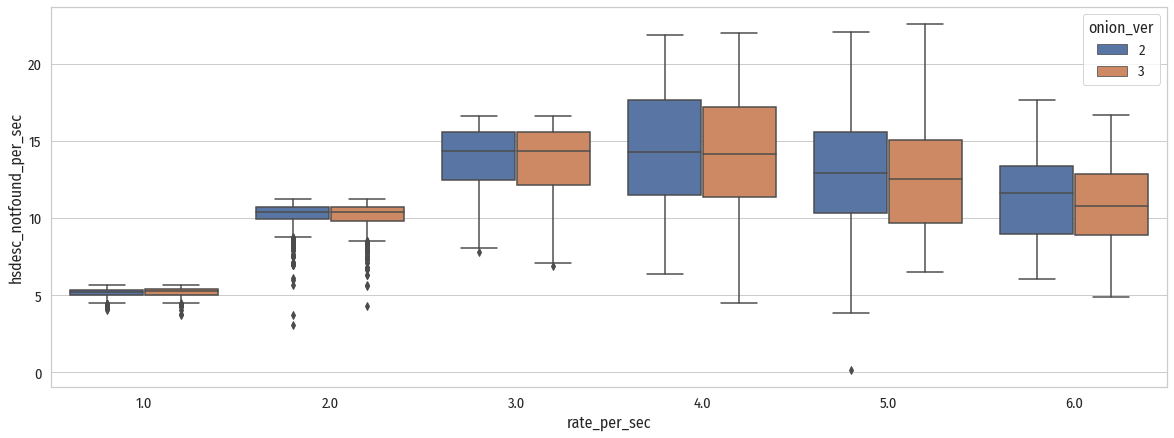

In [10]:
plt.figure(figsize=(20, 7))

sns.set()
sns.set(style="whitegrid", font_scale=1.33)
sns.set_style({"font.family": "Fira Sans Condensed"})

sns.boxplot(data=df, x="rate_per_sec", y="hsdesc_notfound_per_sec", hue="onion_ver")

### `HSDESC_NOTFOUND_PER_SEC` per Host for Onion Version 2

<AxesSubplot:xlabel='rate_per_sec', ylabel='hsdesc_notfound_per_sec'>

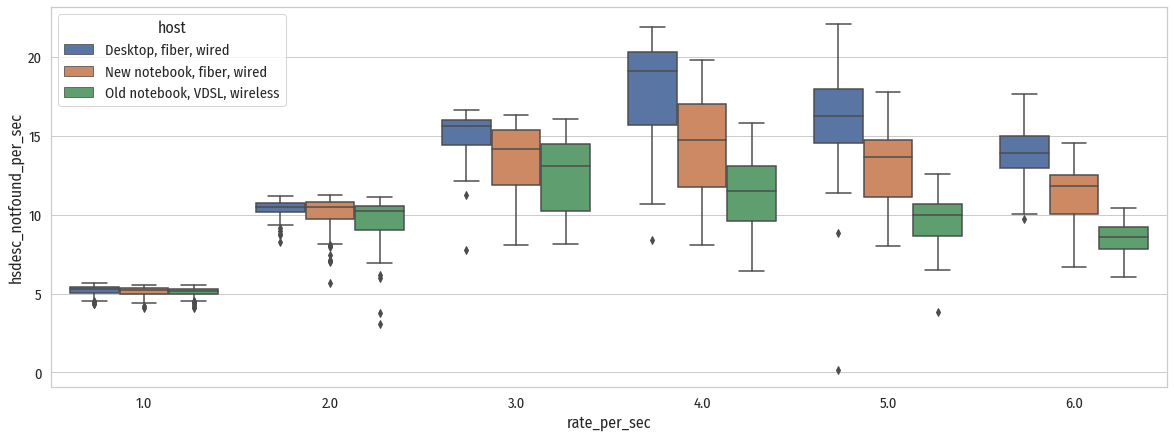

In [11]:
plt.figure(figsize=(20, 7))

sns.set()
sns.set(style="whitegrid", font_scale=1.33)
sns.set_style({"font.family": "Fira Sans Condensed"})

sns.boxplot(data=df[df.onion_ver==2], x="rate_per_sec", y="hsdesc_notfound_per_sec", hue="host", hue_order=["Desktop, fiber, wired", "New notebook, fiber, wired", "Old notebook, VDSL, wireless"])

### `HSDESC_NOTFOUND_PER_SEC` per Host for Onion Version 3

<AxesSubplot:xlabel='rate_per_sec', ylabel='hsdesc_notfound_per_sec'>

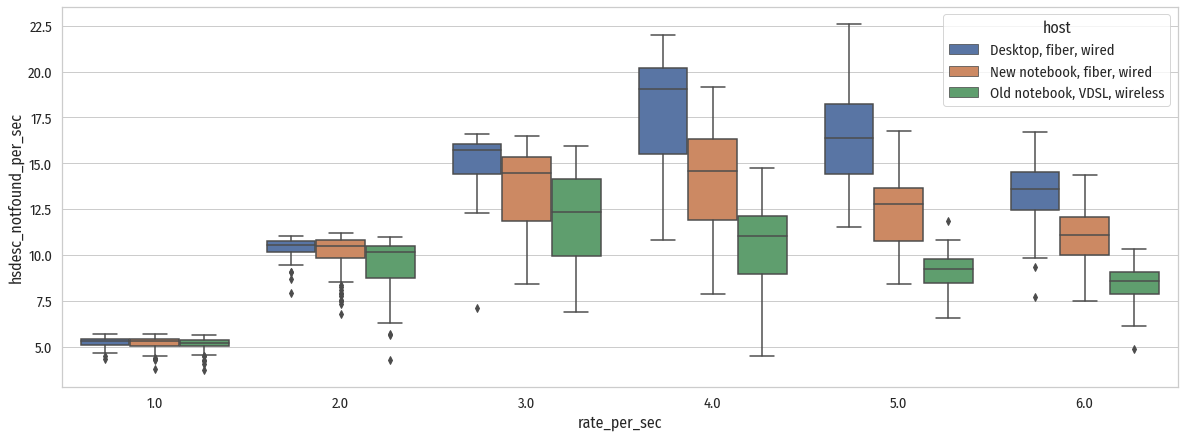

In [12]:
plt.figure(figsize=(20, 7))

sns.set()
sns.set(style="whitegrid", font_scale=1.33)
sns.set_style({"font.family": "Fira Sans Condensed"})

sns.boxplot(data=df[df.onion_ver==3], x="rate_per_sec", y="hsdesc_notfound_per_sec", hue="host", hue_order=["Desktop, fiber, wired", "New notebook, fiber, wired", "Old notebook, VDSL, wireless"])

In [13]:
# This command is used to generate the raw version of Table 1 in Section 4.1.
print(df.groupby(["rate_per_sec", "onion_ver"]).hsdesc_notfound_per_sec.describe()\
      .to_latex(columns=["50%", "min", "max"], float_format="{:0.3f}".format, multirow=True, bold_rows=True))

\begin{tabular}{llrrr}
\toprule
    &   &    50\% &   min &    max \\
\textbf{rate\_per\_sec} & \textbf{onion\_ver} &        &       &        \\
\midrule
\multirow{2}{*}{\textbf{1.0}} & \textbf{2} &  5.216 & 4.076 &  5.681 \\
    & \textbf{3} &  5.267 & 3.737 &  5.674 \\
\cline{1-5}
\multirow{2}{*}{\textbf{2.0}} & \textbf{2} & 10.416 & 3.083 & 11.225 \\
    & \textbf{3} & 10.405 & 4.277 & 11.221 \\
\cline{1-5}
\multirow{2}{*}{\textbf{3.0}} & \textbf{2} & 14.377 & 7.790 & 16.620 \\
    & \textbf{3} & 14.334 & 6.877 & 16.600 \\
\cline{1-5}
\multirow{2}{*}{\textbf{4.0}} & \textbf{2} & 14.298 & 6.402 & 21.894 \\
    & \textbf{3} & 14.180 & 4.513 & 21.985 \\
\cline{1-5}
\multirow{2}{*}{\textbf{5.0}} & \textbf{2} & 12.906 & 0.170 & 22.091 \\
    & \textbf{3} & 12.555 & 6.535 & 22.607 \\
\cline{1-5}
\multirow{2}{*}{\textbf{6.0}} & \textbf{2} & 11.611 & 6.070 & 17.660 \\
    & \textbf{3} & 10.811 & 4.868 & 16.718 \\
\bottomrule
\end{tabular}



In [14]:
# This command is used to generate the raw version of Table 2 in Section 4.1.
print(df.groupby(["rate_per_sec", "host"]).hsdesc_notfound_per_sec.describe()\
      .to_latex(columns=["50%"], float_format="{:0.3f}".format, multirow=True, bold_rows=True))

\begin{tabular}{llr}
\toprule
    &                              &    50\% \\
\textbf{rate\_per\_sec} & \textbf{host} &        \\
\midrule
\multirow{3}{*}{\textbf{1.0}} & \textbf{Desktop, fiber, wired} &  5.293 \\
    & \textbf{New notebook, fiber, wired} &  5.250 \\
    & \textbf{Old notebook, VDSL, wireless} &  5.194 \\
\cline{1-3}
\multirow{3}{*}{\textbf{2.0}} & \textbf{Desktop, fiber, wired} & 10.520 \\
    & \textbf{New notebook, fiber, wired} & 10.495 \\
    & \textbf{Old notebook, VDSL, wireless} & 10.200 \\
\cline{1-3}
\multirow{3}{*}{\textbf{3.0}} & \textbf{Desktop, fiber, wired} & 15.680 \\
    & \textbf{New notebook, fiber, wired} & 14.292 \\
    & \textbf{Old notebook, VDSL, wireless} & 12.763 \\
\cline{1-3}
\multirow{3}{*}{\textbf{4.0}} & \textbf{Desktop, fiber, wired} & 19.063 \\
    & \textbf{New notebook, fiber, wired} & 14.592 \\
    & \textbf{Old notebook, VDSL, wireless} & 11.275 \\
\cline{1-3}
\multirow{3}{*}{\textbf{5.0}} & \textbf{Desktop, fiber, wired} & 16.342 \